In [191]:
path = r"D:\Mirage-Omega1\ml_models\ete-synthesis\audios\mirage_1.wav"

In [192]:
import torchaudio as tad
import matplotlib.pyplot as plt

In [193]:
sample_frame = 8000
waveform, sample_rate = tad.load(path,
                                frame_offset=sample_frame,
                                num_frames=sample_frame * 6,
                                normalize=False,
                                channels_first=True)

In [194]:
waveform, sample_rate

(tensor([[  0,   0,   0,  ..., -22,  55, -44]], dtype=torch.int16), 16000)

Text(0.5, 1.0, 'waveform')

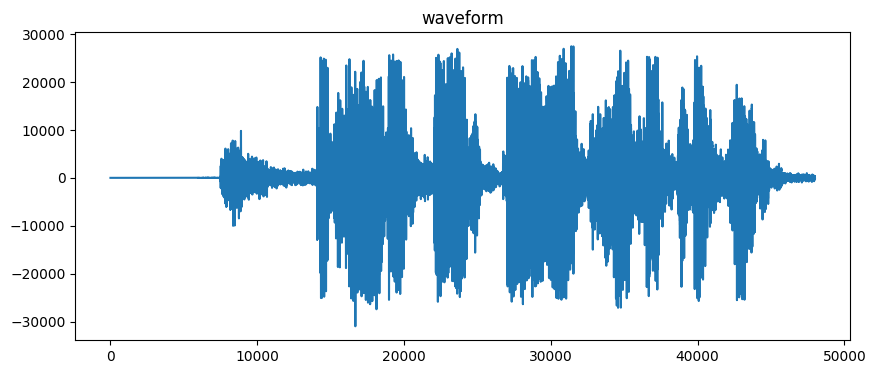

In [195]:
plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())
plt.title("waveform")

Text(0.5, 1.0, 'waveform')

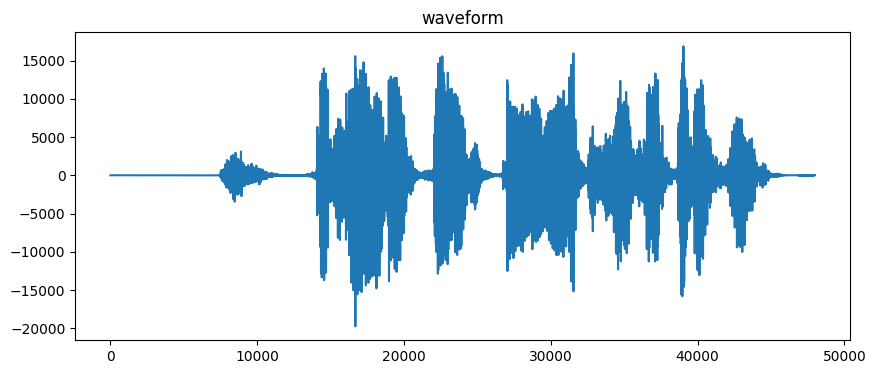

In [196]:
import noisereduce as nr

reduced_noise = nr.reduce_noise(y=waveform.numpy()[0], sr=sample_rate)
plt.figure(figsize=(10, 4))
plt.plot(reduced_noise)
plt.title("waveform")

In [197]:
waveform.shape

torch.Size([1, 48000])

In [198]:
waveform.permute(1, 0)

tensor([[  0],
        [  0],
        [  0],
        ...,
        [-22],
        [ 55],
        [-44]], dtype=torch.int16)

In [199]:
waveform.permute(0, 1)

tensor([[  0,   0,   0,  ..., -22,  55, -44]], dtype=torch.int16)

In [200]:
import torch
reduced_tensor = torch.from_numpy(reduced_noise).unsqueeze(0)
output_path = r"D:\Mirage-Omega1\ml_models\ete-synthesis\processed_audios\mirage_1_denoised.wav"
tad.save(output_path,
        reduced_tensor,
        sample_rate)

In [201]:
import torchaudio.functional as F 

low_cutoff = 300.0  # Hz
high_cutoff = 1700.0  # Hz
waveform = waveform.to(torch.float32)
# Apply highpass filter
waveform = F.highpass_biquad(waveform, sample_rate, cutoff_freq=low_cutoff)

# Apply lowpass filter
waveform = F.lowpass_biquad(waveform, sample_rate, cutoff_freq=high_cutoff)

# Save the filtered audio
tad.save("output_filtered_torchaudio.wav", waveform, sample_rate)